In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
results  = np.load('raw/wolfpack/run_test2.npy')
print(results.shape)

(10, 11, 11, 2)


In [34]:
results = np.mean(results, axis=3)
results = np.mean(results, axis=0)
print(results)

[[ 362.1   658.4   470.5   336.9   762.5   494.    497.1   442.7   347.3
   563.15  530.1 ]
 [ 341.9   259.4   535.7   410.6   298.1   332.4   334.8   480.8   412.6
   312.1   587.3 ]
 [ 535.3   392.25  510.6   312.7   462.6   454.2   397.5   598.8   512.95
   244.45  256.1 ]
 [ 228.55  445.95  525.6   580.2   472.2   366.8   489.4   524.3   473.7
   713.5   593.7 ]
 [ 517.2   345.6   388.6   411.7   530.9   305.3   421.5   569.7   530.5
   481.2   621.9 ]
 [ 471.8   594.    466.4   578.35  381.6   502.25  591.7   409.7   391.
   437.4   481.2 ]
 [ 457.35  458.8   530.45  517.6   714.3   555.7   567.8   472.    513.6
   527.85  540.  ]
 [ 417.7   553.7   634.6   187.    644.55  635.7   657.85  564.9   456.1
   449.8   535.6 ]
 [ 717.95  431.6   299.5   494.65  413.65  272.2   444.9   632.9   212.3
   566.5   267.3 ]
 [ 392.1   448.35  590.3   573.9   560.7   594.    489.8   525.4   552.1
   488.9   492.  ]
 [ 491.65  712.5   287.3   647.4   666.9   159.4   720.6   407.4   605.8
   648.

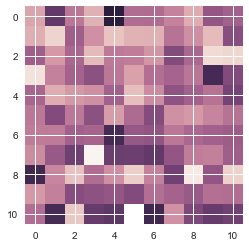

In [37]:
cmap =sns.cubehelix_palette(light=1, as_cmap=True)
plt.imshow(results, cmap=cmap, interpolation='nearest')
plt.show()